Nama : Fadhilah Amani Alam Aulia

Batch : 15

# Data Loading
Ambil data dari bigquery dengan menggunakan:

 `SELECT report_date, load_time, load_type, load_weight, dropoff_site FROM 'bigquery-public-data.austin_waste.waste_and_diversion' WHERE report_date BETWEEN '2021-01-01' AND '2021-07-09'`

In [82]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from numpy import sqrt
import seaborn as sns

In [2]:
data = pd.read_csv('h8dsft_P0GC2_fadhilah_amani_alam_aulia.csv')
data

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08T12:00:00Z,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08T11:00:00Z,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08T03:00:00Z,TIRES,800.0,MRF
3,2021-05-01,2021-05-01T12:29:00Z,TIRES,760.0,MRF
4,2021-07-03,2021-07-03T12:09:00Z,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01T11:26:00Z,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01T04:27:00Z,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01T05:55:00Z,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02T01:10:00Z,ORGANICS,5640.0,ORGANICS BY GOSH


In [3]:
data.head(6)

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08T12:00:00Z,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08T11:00:00Z,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08T03:00:00Z,TIRES,800.0,MRF
3,2021-05-01,2021-05-01T12:29:00Z,TIRES,760.0,MRF
4,2021-07-03,2021-07-03T12:09:00Z,TIRES,1400.0,MRF
5,2021-02-27,2021-02-27T12:43:00Z,TIRES,320.0,MRF


In [4]:
data.tail(6)

,report_date,load_time,load_type,load_weight,dropoff_site
26151,2021-03-01,2021-03-01T11:19:00Z,ORGANICS,18580.0,ORGANICS BY GOSH
26152,2021-03-01,2021-03-01T11:26:00Z,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01T04:27:00Z,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01T05:55:00Z,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02T01:10:00Z,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01T10:22:00Z,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


# Problem 1 (Stats)

1. Menangani Missing Values

In [5]:
# Mengecek jumlah missing values pada setiap kolom
data.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

In [6]:
# Menghapus setiap data yang terdapat missing values
data = data.dropna(axis = 0, how = 'any')

In [7]:
# Mengecek kembali jumlah missing values di setiap kolom
data.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

2. Eksplorasi Data

In [8]:
# Melihat rentang waktu pengambilan data
data.sort_values('report_date', ascending = True)

,report_date,load_time,load_type,load_weight,dropoff_site
19227,2021-01-02,2021-01-02T09:51:00Z,ORGANICS,16760.0,ORGANICS BY GOSH
19158,2021-01-02,2021-01-02T01:05:00Z,GARBAGE COLLECTIONS,9860.0,TDS LANDFILL
19159,2021-01-02,2021-01-02T02:00:00Z,GARBAGE COLLECTIONS,10580.0,TDS LANDFILL
19160,2021-01-02,2021-01-02T12:55:00Z,GARBAGE COLLECTIONS,21300.0,TDS LANDFILL
19161,2021-01-02,2021-01-02T12:56:00Z,GARBAGE COLLECTIONS,17160.0,TDS LANDFILL
...,...,...,...,...,...
211,2021-07-09,2021-07-09T06:00:00Z,BRUSH,5500.0,HORNSBY BEND
207,2021-07-09,2021-07-09T02:57:00Z,BRUSH,5500.0,HORNSBY BEND
208,2021-07-09,2021-07-09T03:45:00Z,BRUSH,5500.0,HORNSBY BEND
217,2021-07-09,2021-07-09T06:20:00Z,BRUSH,5500.0,HORNSBY BEND


Pengambilan data pada tahun 2021 dimulai dari tanggal 2 Januari 2021 (2021-01-02) hingga tanggal 9 Juli 2021 (2021-07-09)

In [182]:
# Tipe load sampah di kota Austin
d = data['load_type'].unique()

t_sampah = pd.DataFrame(d)

t_sampah.rename(index=str, columns={0: 'Tipe Sampah'})

,Tipe Sampah
0,TIRES
1,RECYCLING - SINGLE STREAM
2,BRUSH
3,GARBAGE COLLECTIONS
4,YARD TRIMMING
5,BULK
6,DEAD ANIMAL
7,ORGANICS
8,MIXED LITTER
9,SWEEPING


In [183]:
# Lokasi tempat pembuangan sampah
e = data['dropoff_site'].unique()

lok = pd.DataFrame(e)

lok.rename(index=str, columns={0: 'Tempat Pembuangan Sampah'})

,Tempat Pembuangan Sampah
0,MRF
1,TDS - MRF
2,HORNSBY BEND
3,TDS LANDFILL
4,ORGANICS BY GOSH
5,BALCONES RECYCLING
6,ON ROUTE HIGH DUMP
7,AUSTIN IRON AND METAL
8,PARK BEND
9,BALCONES WOODS


3. Central Tendency

In [11]:
# Menghitung nilai mean pada setiap site
data.groupby('dropoff_site')['load_weight'].mean().sort_values(ascending=False)

dropoff_site
GREAT NORTHERN           19153.333333
WESTFIELD                16020.000000
TDS LANDFILL             15169.407215
PARK BEND                13385.000000
ON ROUTE HIGH DUMP       12525.714286
ORGANICS BY GOSH         11818.482146
TDS - MRF                 9872.550882
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
HORNSBY BEND              6628.644068
AUSTIN WOOD RECYCLING     4050.000000
MRF                       1799.982143
STEINER LANDFILL           780.000000
AUSTIN IRON AND METAL      451.200000
Name: load_weight, dtype: float64

In [12]:
# Menghitung nilai median pada setiap site
data.groupby('dropoff_site')['load_weight'].median().sort_values(ascending=False)

dropoff_site
GREAT NORTHERN           21110.0
WESTFIELD                16020.0
ON ROUTE HIGH DUMP       14940.0
TDS LANDFILL             14920.0
PARK BEND                12330.0
ORGANICS BY GOSH         11920.0
TDS - MRF                10330.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
HORNSBY BEND              6390.0
AUSTIN WOOD RECYCLING     4050.0
MRF                       1360.0
STEINER LANDFILL           780.0
AUSTIN IRON AND METAL      400.0
Name: load_weight, dtype: float64

In [13]:
# Menghitung nilai modus pada setiap site
data.groupby(['dropoff_site'])['load_weight'].apply(pd.Series.mode)

dropoff_site            
AUSTIN IRON AND METAL  0      260.0
                       1      320.0
                       2      520.0
AUSTIN WOOD RECYCLING  0     2340.0
                       1     5760.0
BALCONES RECYCLING     0    11880.0
BALCONES WOODS         0     8460.0
GREAT NORTHERN         0     8700.0
                       1    17160.0
                       2    20900.0
                       3    21320.0
                       4    21960.0
                       5    24880.0
HORNSBY BEND           0     5500.0
MRF                    0      960.0
ON ROUTE HIGH DUMP     0     4060.0
                       1     7480.0
                       2    12500.0
                       3    14940.0
                       4    15040.0
                       5    15200.0
                       6    18460.0
ORGANICS BY GOSH       0    14580.0
PARK BEND              0     8480.0
                       1     8960.0
                       2    15700.0
                       3    20400.0
STE

Berdasarkan perhitungan nilai modus, dapat diketahui bahwa beberapa dropoff site memiliki satu nilai modus dan beberapa dropoff site lainnya yang memiliki nilai modus lebih dari satu (multimodal).

- Dropoff site yang memiliki satu nilai modus adalah:
    - BALCONES RECYCLING
    - BALCONES WOODS
    - HORNSBY BEND
    - MRF
    - ORGANICS BY GOSH
    - STEINER LANDFILL
    - TDS - MRF
    - WESTFIELD
        
- Dropoff site yang multimodal adalah:
    - AUSTIN IRON AND METAL
    - AUSTIN WOOD RECYCLING
    - GREAT NORTHERN
    - ON ROUTE HIGH DUMP
    - PARK BEND
    - TDS LANDFILL

4. Site yang dipilih

    Site yang saya pilih adalah MRF. Karena diantara site yang hanya memiliki satu nilai modus, site MRF lah yang memiliki nilai modus paling kecil, yaitu 960 dengan nilai mean = 1799.982143 dan nilai median = 1360.0

5. Cek outlier pada data 'load_weight' di dropoff_site MRF

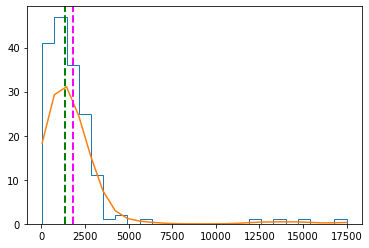

In [14]:
# Visualisasi distribusi data load_weight pada site MRF
load_site = data.loc[data['dropoff_site'] == 'MRF']['load_weight']
density = stats.gaussian_kde(load_site)
n, x, _ = plt.hist(load_site, histtype='step', bins=25)  
plt.plot(x, density(x)*10**5)
plt.axvline(load_site.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(load_site.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Data load_weight pada site MRF memiliki:
- Nilai Mean: 1799.982143
- Nilai Median: 1360.0
- Nilai Modus: 960

Karena nilai Mean > Median > Modus, maka distribusi data load_weight pada site MRF memiliki kecondongan ke kanan atau distribusi Right-Skewness.

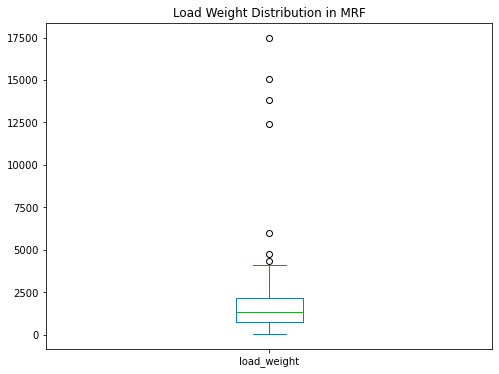

In [22]:
# Visualisasi data outlier di MRF dengan box plot
load_site.plot(kind='box', title='Load Weight Distribution in MRF', figsize=(8,6))
plt.show()

In [63]:
# Mengubah data load_site menjadi dataframe baru
load_site = data.loc[data['dropoff_site'] == 'MRF']['load_weight']
data_ls = pd.DataFrame(load_site, columns=['load_weight'])
data_ls

,load_weight
0,2260.0
1,1260.0
2,800.0
3,760.0
4,1400.0
...,...
25414,700.0
25415,580.0
25416,2060.0
25691,1180.0


Nilai IQR:
1300.0
Nilai maksimum:
3970.0
Nilai minimum:
-1230.0


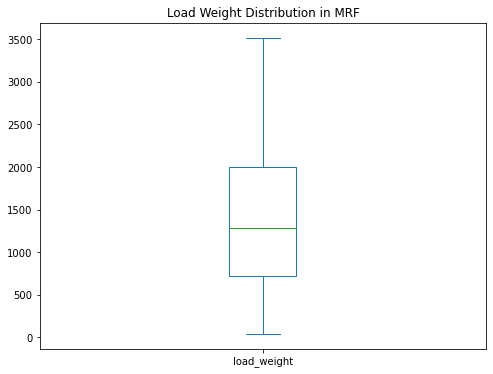

In [140]:
# Menangani data outlier dengan IQR
Q1 = data_ls['load_weight'].quantile(0.25)
Q3 = data_ls['load_weight'].quantile(0.75)
IQR = Q3 - Q1
print('Nilai IQR:')
print(IQR)

# Mencari nilai maksimum
nilai_max = Q3 + (1.5 * IQR)
print('Nilai maksimum:')
print(nilai_max)

# Mencari nilai minimum
nilai_min = Q1 - (1.5 * IQR)
print('Nilai minimum:')
print(nilai_min)

# Merubah data outlier menjadi null dan menghapusnya
data_ls = data_ls[~((data_ls < nilai_min) | (data_ls > nilai_max)).any(axis=1)]

# Visualisasi tanpa data outlier di MRF dengan box plot
data_ls.plot(kind='box', title='Load Weight Distribution in MRF', figsize=(8,6))
plt.show()

In [141]:
# Central Tendency sebelum data outlier ditangani
print('Nilai mean, median dan modus sebelum data outlier ditangani:')
print('Nilai Mean: ')
print(load_site.mean())
print('Nilai Median: ')
print(load_site.median())
print('Nilai Modus: ')
print(load_site.mode())

# Central Tendency setelah data outlier ditangani
print('\nNilai mean, median dan modus setelah data outlier ditangani:')
print('Nilai Mean: ')
print(data_ls['load_weight'].mean())
print('Nilai Median: ')
print(data_ls['load_weight'].median())
print('Nilai Modus: ')
print(data_ls['load_weight'].mode())

Nilai mean, median dan modus sebelum data outlier ditangani:
Nilai Mean: 
1799.982142857143
Nilai Median: 
1360.0
Nilai Modus: 
0    960.0
Name: load_weight, dtype: float64

Nilai mean, median dan modus setelah data outlier ditangani:
Nilai Mean: 
1402.16875
Nilai Median: 
1290.0
Nilai Modus: 
0    960.0
Name: load_weight, dtype: float64


6. Range, Variance, dan Standar Deviasi untuk data 'load_weight' di site MRF

In [152]:
# Menghitung Range
print('Nilai Range:')
print(round(data_ls['load_weight'].max() - data_ls['load_weight'].min(),2))

# Menghitung Variance
print('Nilai Variance:')
print(round(data_ls['load_weight'].var(),2))

# Menghitung Standar Deviasi
print('Nilai Standar Deviasi:')
print(round(data_ls['load_weight'].std(),2))

Nilai Range:
3480.0
Nilai Variance:
718857.31
Nilai Standar Deviasi:
847.85


7. Analisa dan saran tentang kapasitas penampungan di site baru berdasarkan Confidence Interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

    Data yang digunakan hanyalah data dari satu site yang telah dipilih sebelumnya, yaitu site MRF, karena data tersebut sudah tidak mempunyai data outlier. Estimasi kapasitas penampungan untuk site baru berada di nilai confidence intervalnya.

In [155]:
# Menghitung confidence interval
ci = stats.norm.interval(0.95, data_ls['load_weight'].mean(), data_ls['load_weight'].std())
'''
    `data_ls['load_weight'].mean()` : rata-rata dari site MRF yang telah dihapus data outliernya
    `data_ls['load_weight'].std()` : standar deviasi dari site MRF yang telah dihapus data outliernya
'''
# Membulatkan hasil perhitungan confidence interval
print('Nilai Confidence Interval:', round(ci[1],2))   

Nilai Confidence Interval: 3063.93


8. Analisa Uji Hipotesis dan perhitungan dengan t-test

    Hipotesis:
    
    Apakah rata-rata harian load_weight pada dua dropoff site berbeda secara signifikan atau tidak?
    
    Sample yang dipilih adalah dropoff site TDS - MRF dan BALCONES RECYCLING.

- H0 : Tidak ada perbedaan yang signifikan antara rata-rata harian TDS - MRF dan rata-rata harian Balcones Recycling
- H1 : Terdapat perbedaan yang siginifikan antara rata-rata harian TDS - MRF dan rata-rata harian Balcones Recycling

Rata-rata load weight di TDS - MRF per hari: 272003.0
Rata-rata load weight di BALCONES RECYCLING per hari: 386339.0

P-value: 0.0008375051599761302
t-statistics: -3.391814732505006


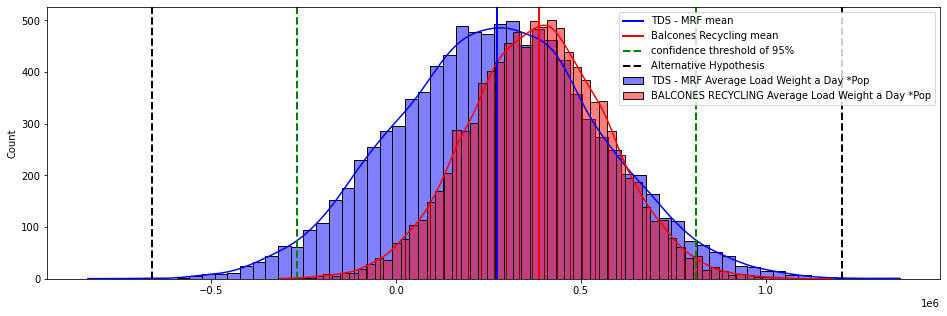

In [157]:
# Menghitung rata-rata TDS - MRF dan Balcones Recycling
d_mrf = data[data['dropoff_site'] == 'TDS - MRF'][['report_date', 'load_weight']].groupby('report_date').sum()
d_balcones = data[data['dropoff_site'] == 'BALCONES RECYCLING'][['report_date', 'load_weight']].groupby('report_date').sum()

print('Rata-rata load weight di TDS - MRF per hari: {}'.format(np.round(d_mrf.load_weight.mean())))
print('Rata-rata load weight di BALCONES RECYCLING per hari: {}'.format(np.round(d_balcones.load_weight.mean())))

# Menghitung nilai p-value dengan t-test
t_stat, p_val = stats.ttest_ind(d_mrf, d_balcones)
print('\nP-value:',p_val[0])
print('t-statistics:',t_stat[0])

# Menghitung mean sample
s_mrf = np.random.normal(d_mrf.load_weight.mean(), d_mrf.load_weight.std(),10000)
s_balcones = np.random.normal(d_balcones.load_weight.mean(),d_balcones.load_weight.std(),10000)

# Menghitung nilai confidence interval
ci = stats.norm.interval(0.95, d_mrf.load_weight.mean(), d_mrf.load_weight.std())

# Visualisasi grafik
plt.figure(figsize=(16,5))
sns.histplot(s_mrf, label='TDS - MRF Average Load Weight a Day *Pop',color='blue', kde=True)
sns.histplot(s_balcones, label='BALCONES RECYCLING Average Load Weight a Day *Pop',color='red', kde=True)

plt.axvline(d_mrf.load_weight.mean(), color='blue', linewidth=2, label='TDS - MRF mean')
plt.axvline(d_balcones.load_weight.mean(), color='red',  linewidth=2, label='Balcones Recycling mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(s_mrf.mean()+t_stat[0]*s_mrf.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(s_mrf.mean()-t_stat[0]*s_mrf.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Dari perhitungan dan grafik diatas, dapat disimpulkan bahwa terdapat perbedaan yang signifikan antara rata-rata harian load weight di site TDS - MRF dengan rata-rata harian load weight di site BALCONES RECYCLING.

---
1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

    Teknik yang dipilih untuk mengatasi outlier adalah dengan perhitungan Inter-Quantile Range (IQR). Karena data mememiliki distribusi Right-Skewness. Setelah perhitungan selesai, data outlier yang ada pada data akan dihapus

2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
    
    Confidence Interval digunakan untuk menentukan keakuratan nilai rata-rata suatu sample terhadap populasinya. Dengan menggunakan confidence interval, kita dapat melakukan estimasi berapa rata-rata terkecil dan berapa rata-rata terbesar yang ada pada suatu populasi. Sehingga, kita tidak perlu menghitung secara keseluruhan populasi, karena dapat diperkirakan dari nilai confidence interval.

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

    Jenis uji hipotesis yang digunakan adalah Two Samples Independent Two Tailed Hypothesis Testing. Karena yang diuji adalah rata-rata dari 2 populasi yang independen.
---

# Problem 2 (Math/Calculus)

In [338]:
# Mengelompokkan load_weight berdasarkan report_date
data_forecast = data.groupby('report_date')['load_weight'].sum()

# Mengurutkan data sesuai dengan report_date dari tanggal terkecil hingga terbesar
data_forecast = data_forecast.to_frame().reset_index()
data_forecast.columns = ['report_date', 'load_weight']
data_forecast.sort_values('report_date', ascending = True)

,report_date,load_weight
0,2021-01-02,2170130.0
1,2021-01-04,2920260.0
2,2021-01-05,2388540.0
3,2021-01-06,2396550.0
4,2021-01-07,2438330.0
...,...,...
160,2021-07-05,1897290.0
161,2021-07-06,1921640.0
162,2021-07-07,1553080.0
163,2021-07-08,1417650.0


In [343]:
# Menentukan Sumbu X dan Sumbu Y
x = data_forecast.index.values
y = data_forecast.load_weight.values

# Melakukan turunan pertama
v = np.gradient(y,x)

# Menghitung weight untuk 10 Juli 2021
w = data_forecast.load_weight[164] + v * 1
w[164]


-1176970.0

---
1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?

    Teknik yang digunakan adalah teknik numerik. Karena data yang diinputkan berbentuk array dan output yang diharapkan adalah data numerik.

2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!

    Ya

3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

    1776970
---